# EDA

In [1]:
!pip install -q kagglehub
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Download dataset
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

/Users/popthrop/Desktop/DS 340/Final Project/DS340/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os

# CSV file in the downloaded directory
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

df = pd.read_csv(csv_file)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Checking for unique vals

In [5]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE',
                    'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for col in categorical_cols:
    print(col, sorted(df[col].unique()))

SEX [np.int64(1), np.int64(2)]
EDUCATION [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
MARRIAGE [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
PAY_0 [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
PAY_2 [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
PAY_3 [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
PAY_4 [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
PAY_5 [np.int64(-2), np.int64(-1), np.int64(0), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
PAY_6 [np.int64(-2), np.int64(-1), np.int64(0), np.int64(2

- In the Education col, category 0 is not defined so we need to recode the 0 to 5 or 6

- In the Marriage col, category 0 is invalid so we need to recode into “others"

In [6]:
df['EDUCATION'] = df['EDUCATION'].replace({0:4, 5:4, 6:4})
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

Make sure all PAY_x are integers

In [7]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df[pay_cols] = df[pay_cols].astype(int)

Target Variable: default.payment.next.month

- Very imbalanced (roughly 78% non-default / 22% default)

  - We'll need to
    - class weights
    - resampling (SMOTE or undersampling)
    - threshold tuning

Checking for outliers

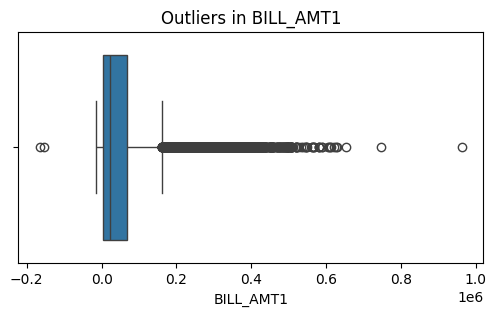

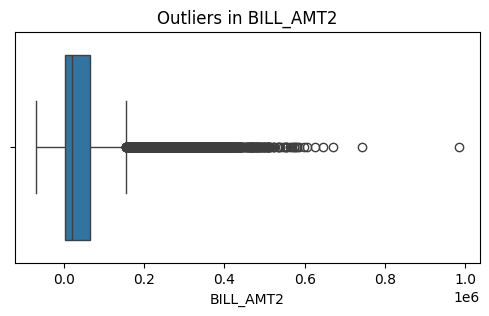

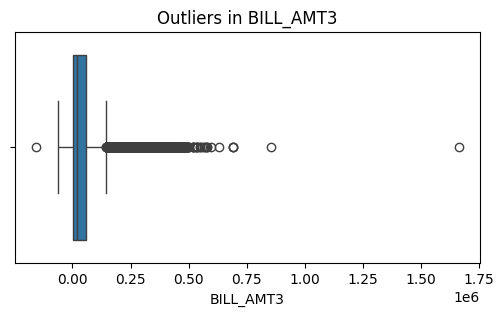

In [8]:
bill_cols = [f'BILL_AMT{i}' for i in range(1,7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1,7)]

for col in bill_cols[:3]:  # first 3 just to preview
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


Dist of PAY_x

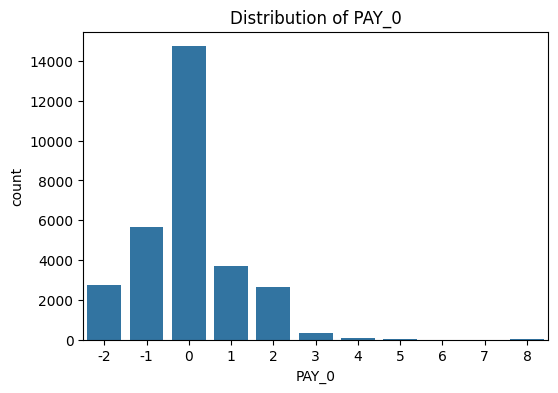

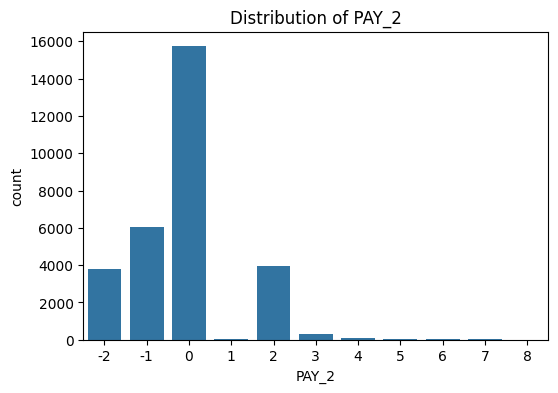

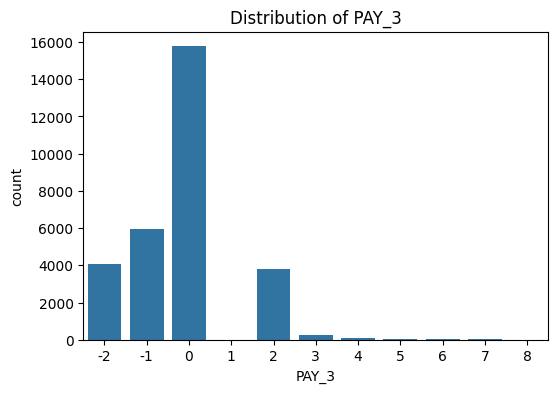

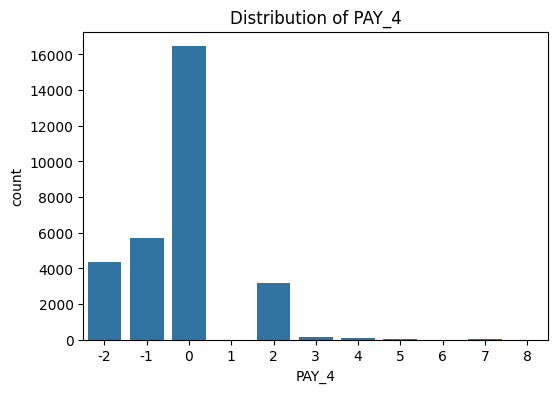

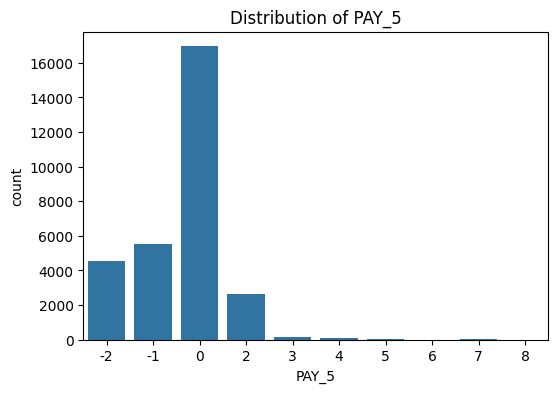

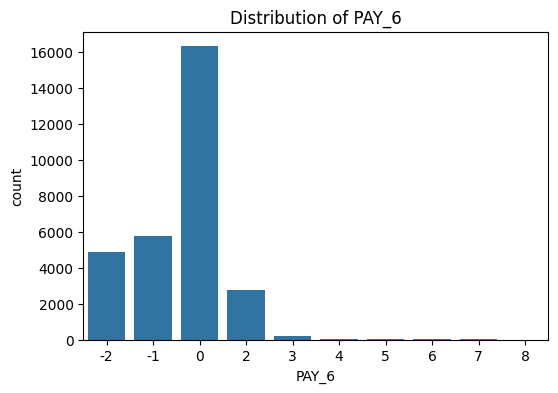

In [9]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for col in pay_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

Dist of demographic fts

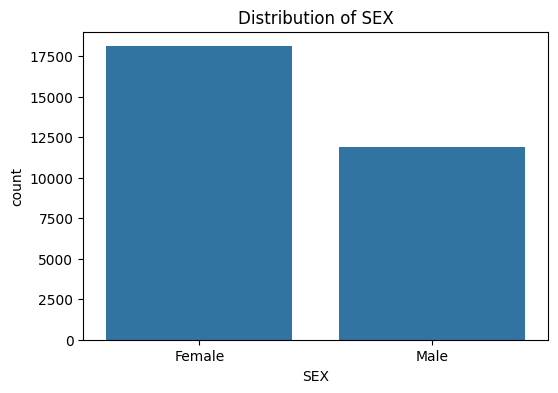

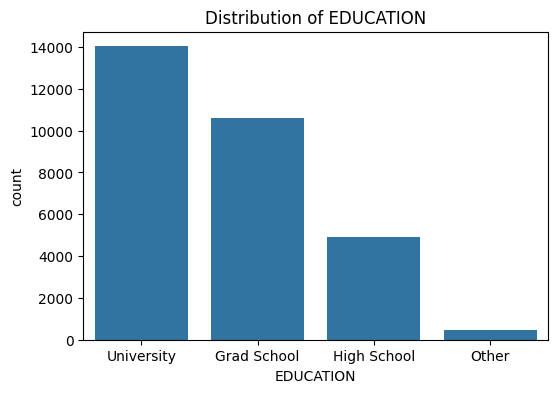

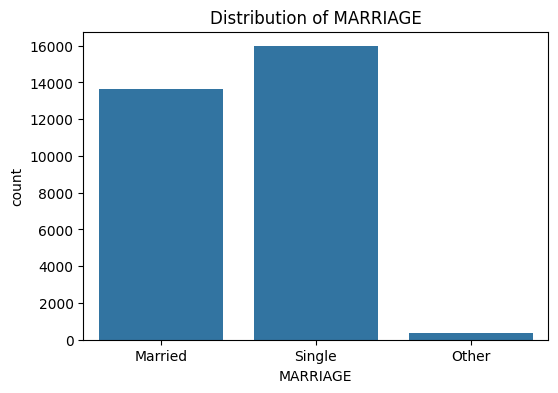

In [10]:
demo_cols = ['SEX','EDUCATION','MARRIAGE']
label_map = {'SEX': {1: 'Male', 2: 'Female'}, 
 'EDUCATION': {1: 'Grad School', 2: 'University', 3: 'High School', 4: 'Other'}, 
 'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Other'}
 }

for col in demo_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col].map(label_map[col]))
    plt.title(f"Distribution of {col}")
    plt.show()

Dist of cont vars

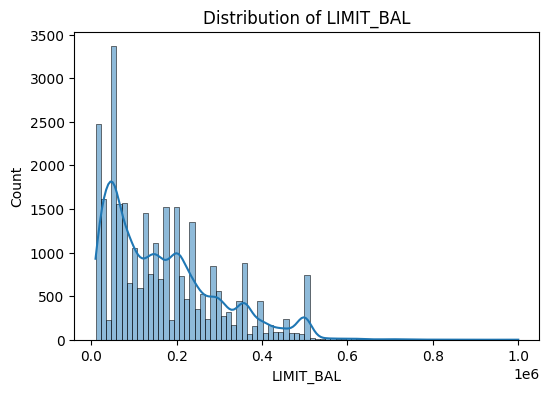

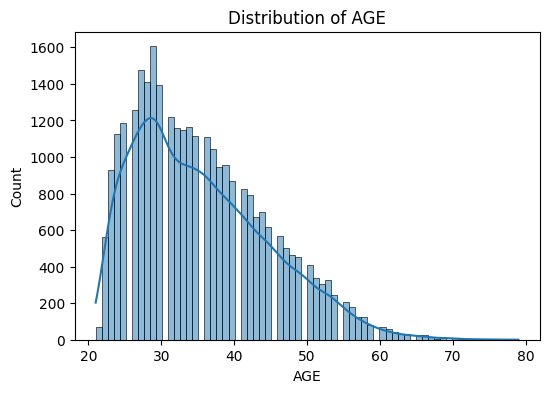

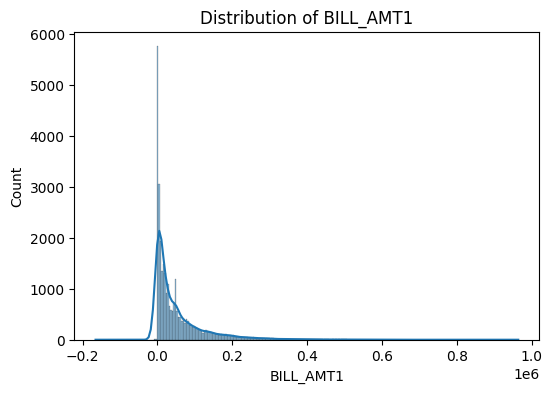

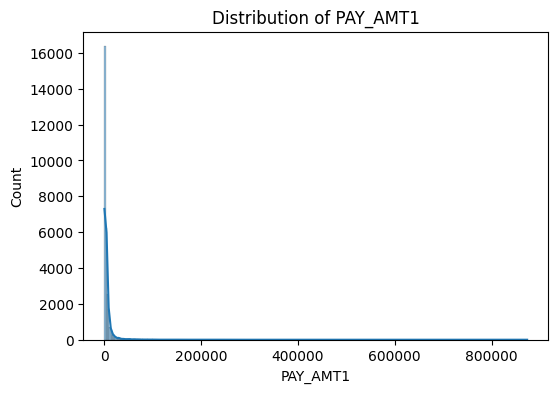

In [11]:
num_cols = ['LIMIT_BAL','AGE','BILL_AMT1','PAY_AMT1']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

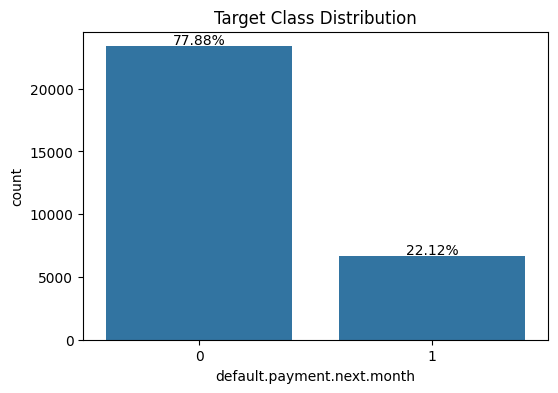

In [12]:
plt.figure(figsize=(6,4))

# Countplot
ax = sns.countplot(x=df['default.payment.next.month'])
plt.title("Target Class Distribution")

# Compute percentages
total = len(df)
for p in ax.patches:
    count = p.get_height()
    pct = 100 * count / total
    ax.text(
        p.get_x() + p.get_width()/2,
        count + total*0.005,
        f"{pct:.2f}%",
        ha='center'
    )
plt.show()

Correlation HeatMap

- Made a heatmap before w/ all fts but too big so kept the important ones

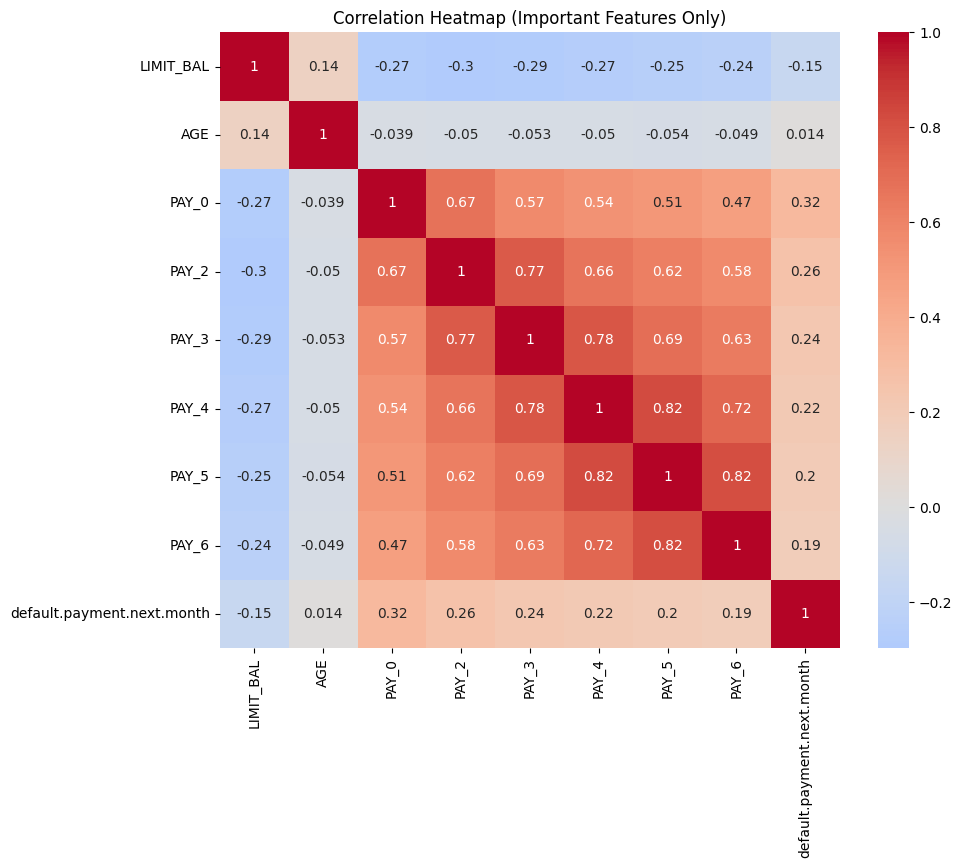

In [13]:
important_cols = [
    'LIMIT_BAL', 'AGE',
    'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
    'default.payment.next.month'
]

plt.figure(figsize=(10,8))
sns.heatmap(df[important_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Important Features Only)")
plt.show()


Correlation w/ target value Barchart

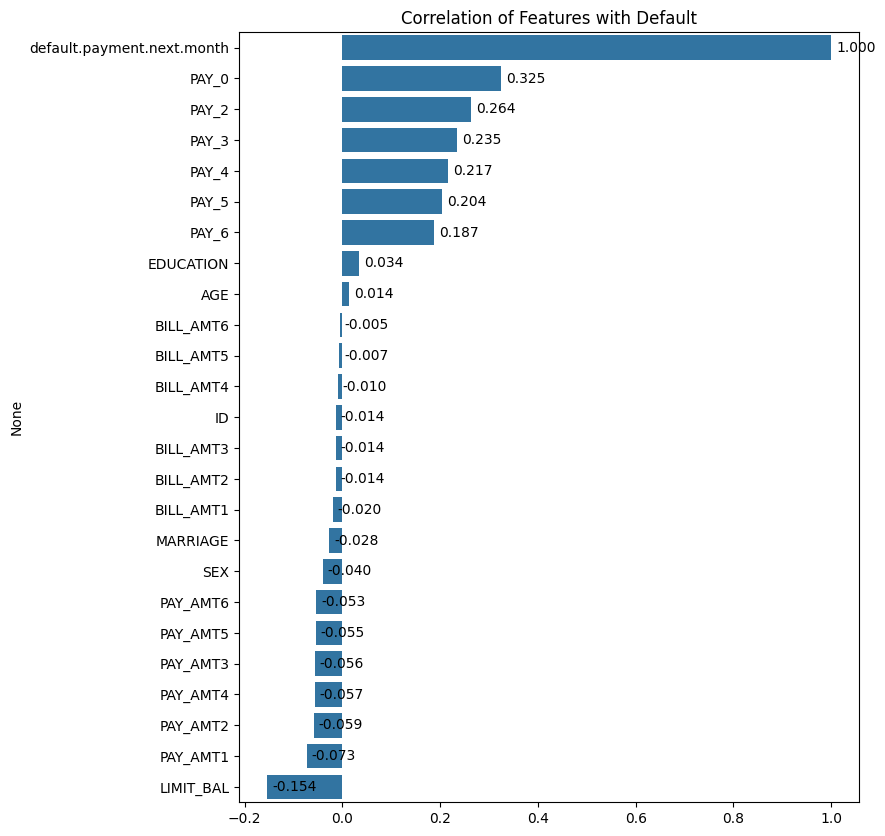

In [14]:
target_corr = df.corr()['default.payment.next.month'].sort_values(ascending=False)

plt.figure(figsize=(8,10))
ax = sns.barplot(x=target_corr.values, y=target_corr.index, orient='h')
plt.title("Correlation of Features with Default")

# Add correlation values to each bar
for i, value in enumerate(target_corr.values):
    ax.text(value + 0.01,               # x-position (slightly to the right of bar)
            i,                          # y-position
            f"{value:.3f}",
            va='center',
            fontsize=10)

plt.show()

Using a Mutual Information Classifier for more information on variables

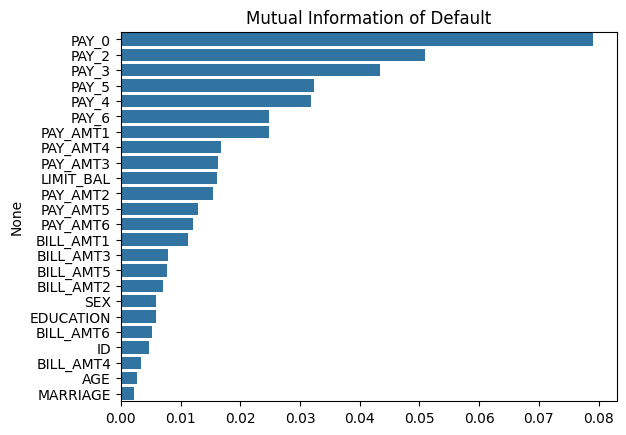

In [15]:
target_vec = df['default.payment.next.month']
feature_vec = df.drop('default.payment.next.month', axis=1)

MI = mutual_info_classif(feature_vec,target_vec)
MI_series = pd.Series(MI,index = feature_vec.columns).sort_values(ascending=False)

plt.Figure((10,8))
sns.barplot(x=MI_series.values, y=MI_series.index)
plt.title('Mutual Information of Default')
plt.show()
